In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
dados = pd.read_csv('tmdb_5000_movies.csv')
dados.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
dados.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


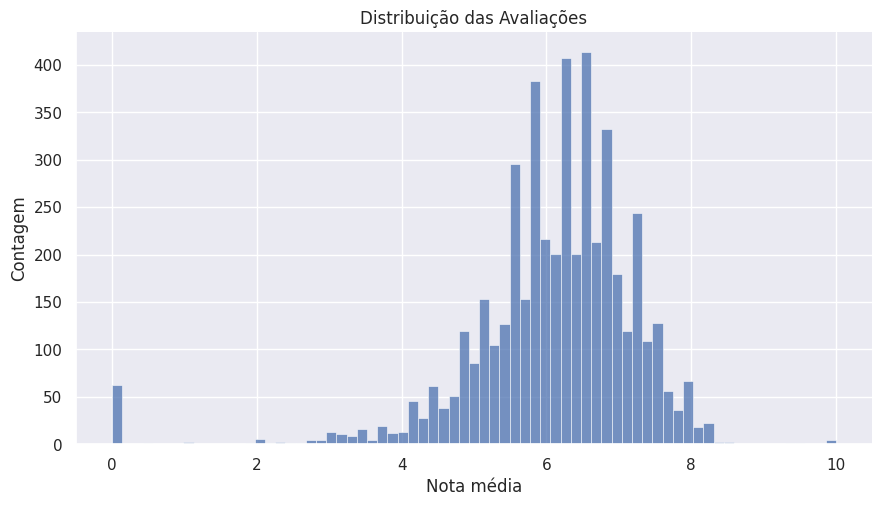

In [4]:

# Gráfico com Densidade dos Dados
ax = sns.displot(dados['vote_average'])
ax.figure.set_size_inches(10,5)

ax.set(xlabel= 'Nota média')
ax.set(ylabel = 'Contagem')
ax.set(title = 'Distribuição das Avaliações');

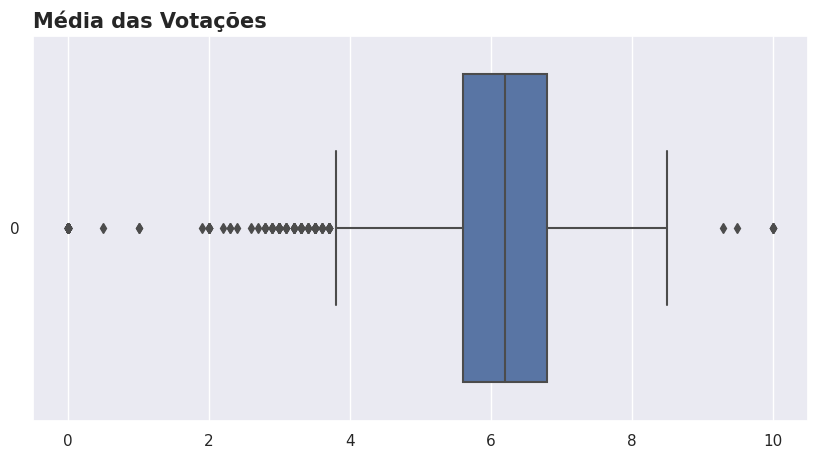

In [5]:
ax = sns.boxplot(dados['vote_average'], orient= 'h')
ax.figure.set_size_inches(10,5)

ax.set_title('Média das Votações', fontsize = 15, weight = 'bold', loc = 'left');

Tem algo errado com os dados...Não faz sentido filmes com nota 10 ou 0

Melhor analisar de forma mais profunda

In [6]:

filmes_media_zero = dados.query('vote_average == 0')
filmes_media_zero.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0


Foram detectados filmes com poucos votos (ou até mesmo nenhum). Decidimos que esses filmes não devem pertencer a nossa análise.

In [7]:
dados2 = dados.query('vote_count > 10')
dados2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## **Filmes com mais de 10 votos**

In [8]:
dados2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.358000e+03,4358.000000,4358.000000,4.358000e+03,4357.000000,4358.000000,4358.000000
mean,3.186705e+07,49112.662001,23.619184,9.059446e+07,108.496443,6.232010,760.249656
std,4.171009e+07,80167.435191,32.661510,1.687623e+08,21.000772,0.888111,1275.510839
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,11.000000
25%,3.000000e+06,8358.250000,6.719426,4.814275e+04,95.000000,5.700000,87.000000
50%,1.800000e+07,12960.500000,14.955512,2.744996e+07,105.000000,6.300000,292.000000
75%,4.300000e+07,46528.750000,30.433317,1.031351e+08,119.000000,6.800000,835.750000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0, 0.5, 'Votos')

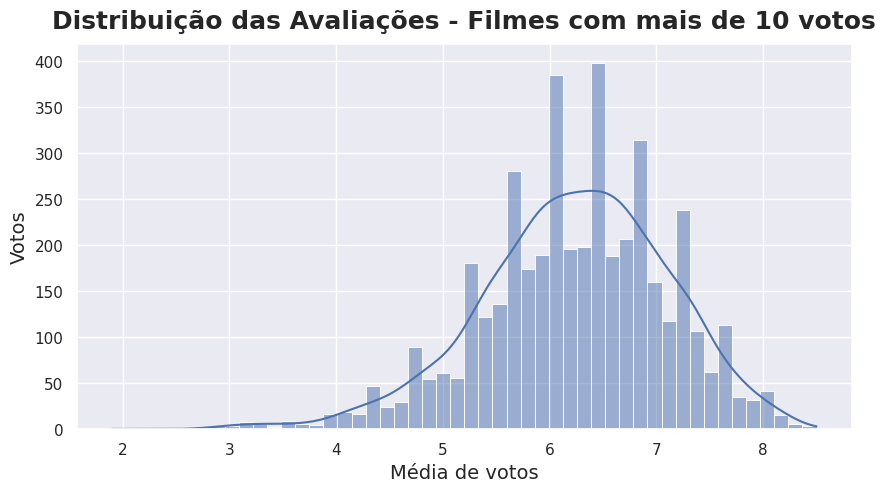

In [9]:
# Gosto mais do Histplot por conta da flexibilidade que o gráfico me dá
ax = sns.histplot(dados2['vote_average'], kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Distribuição das Avaliações - Filmes com mais de 10 votos', fontsize = 18, weight = 'bold', y = 1.02)
ax.set_xlabel('Média de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14)

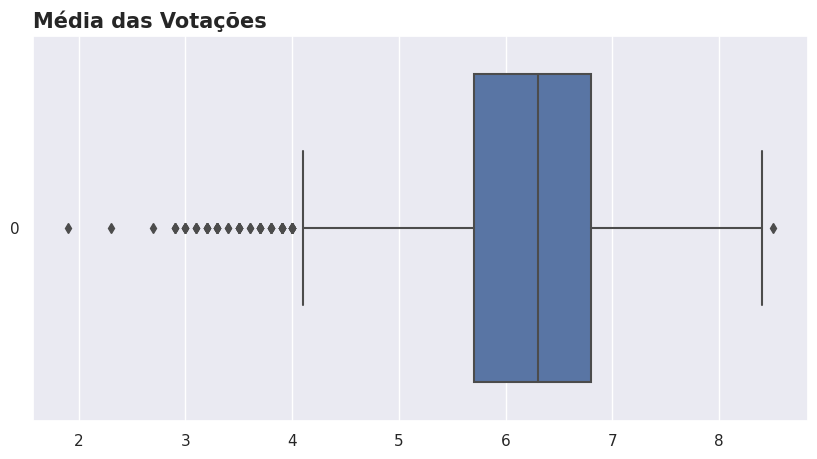

In [10]:
ax = sns.boxplot(dados2['vote_average'], orient= 'h')
ax.figure.set_size_inches(10,5)

ax.set_title('Média das Votações', fontsize = 15, weight = 'bold', loc = 'left');

## **Movielens**

In [11]:
movie = pd.read_csv('ratings.csv')

In [12]:
movie.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Verificando nota média de cada filme
nota_media_por_filme= movie.groupby('movieId').mean()['rating']

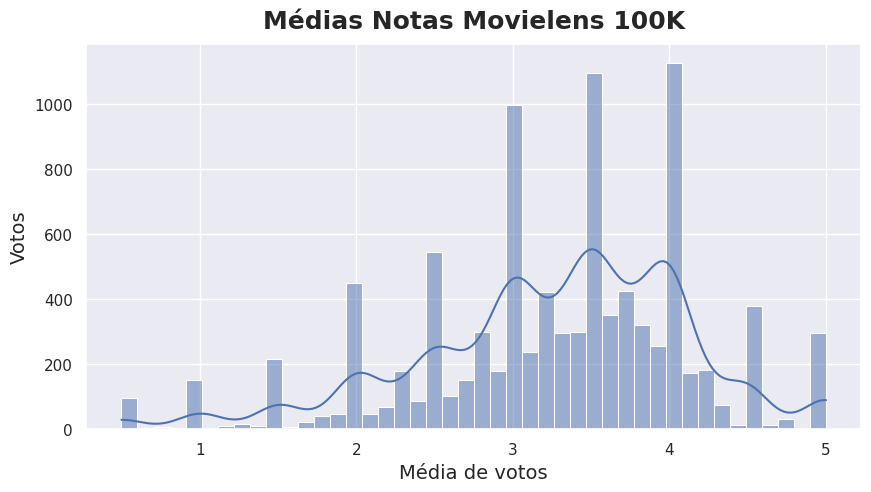

In [14]:
ax = sns.histplot(nota_media_por_filme.values, kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Médias Notas Movielens 100K', fontsize = 18, weight = 'bold', y = 1.02)
ax.set_xlabel('Média de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

In [15]:
# Veriricando quantidade de votos por filme
quantidade_votos_por_filme = movie.groupby('movieId').count()

# Pegando filmes com pelo menos 10 votos (Pegando apenas os IDs do Filmes)
filmes_com_pelo_menos_10_votos = quantidade_votos_por_filme.query('rating > 10').index

In [16]:
# Nota média dos filmes com pelo menos 10 votos
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

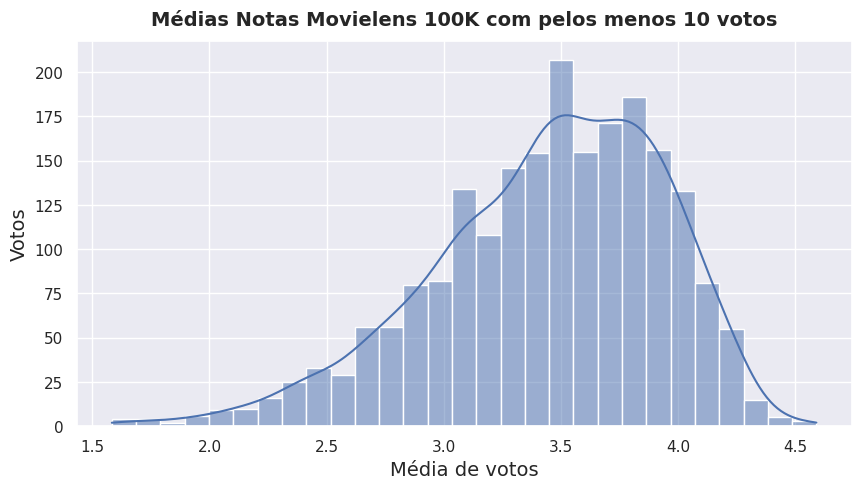

In [17]:
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Médias Notas Movielens 100K com pelos menos 10 votos', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Média de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

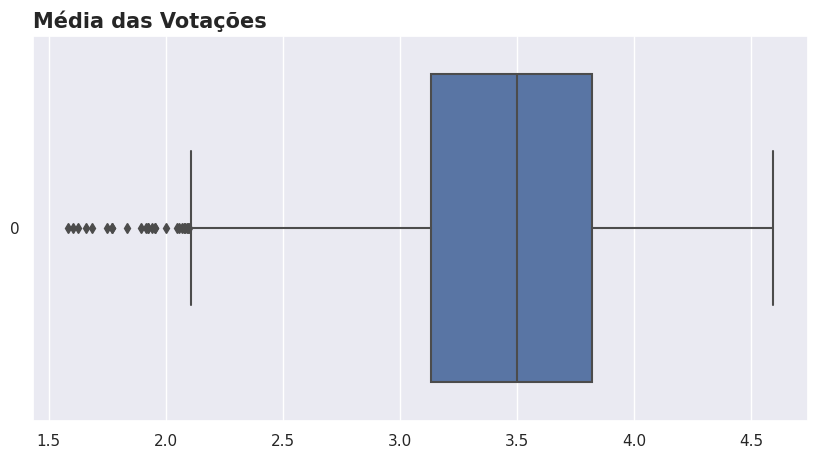

In [18]:
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, orient= 'h')
ax.figure.set_size_inches(10,5)

ax.set_title('Média das Votações', fontsize = 15, weight = 'bold', loc = 'left');

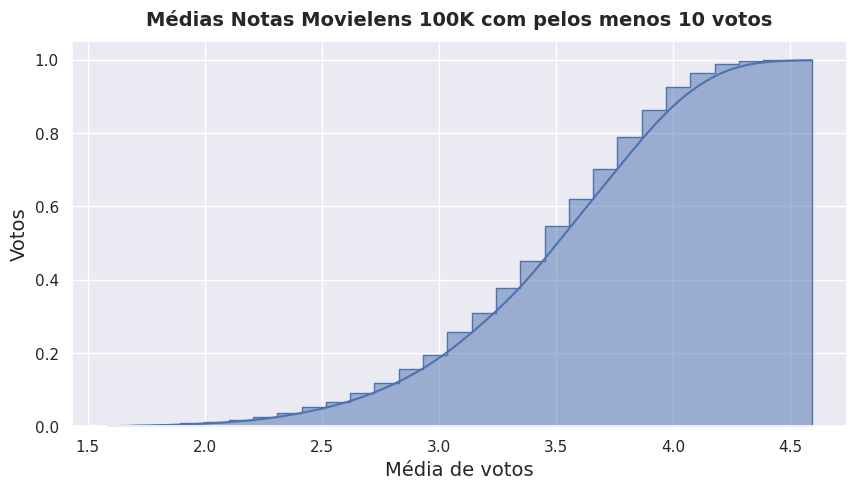

In [19]:
# Proporção acumulada de filmes
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, 
                  element="step", fill=True,cumulative=True,
                  stat="density", common_norm=False, kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Médias Notas Movielens 100K com pelos menos 10 votos', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Média de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

## **Analisando a distribuição dos dados capturadoas de outros campos do TMDB**

In [20]:
# Verificando as colunas
dados2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

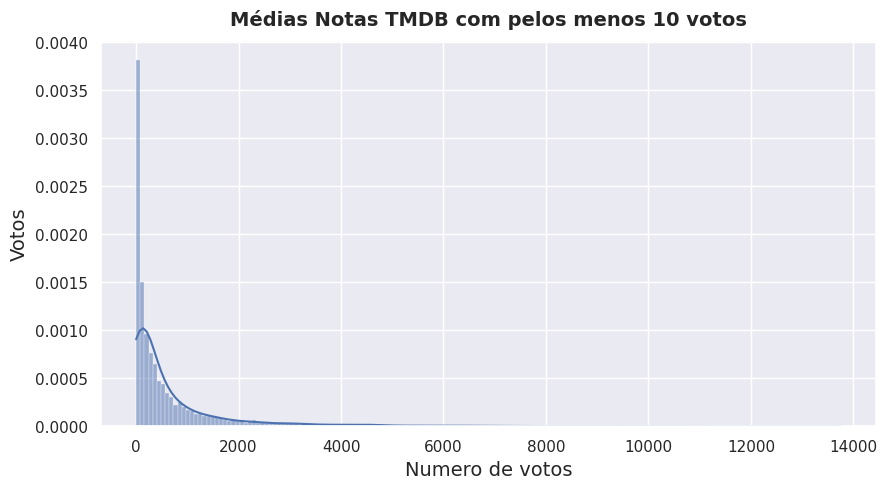

In [21]:
ax = sns.histplot(dados['vote_count'], kde = True, stat="density")
ax.figure.set_size_inches(10,5)


ax.set_title('Médias Notas TMDB com pelos menos 10 votos', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Numero de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

Veja que quando um filme é popular, muita gente acaba votando nele.

Porem, poucos são os filmes extremamento populares. Por isso esta distribuição do gráfico

---

In [22]:
budget_maior_do_zero = dados.query('budget > 0')['budget']

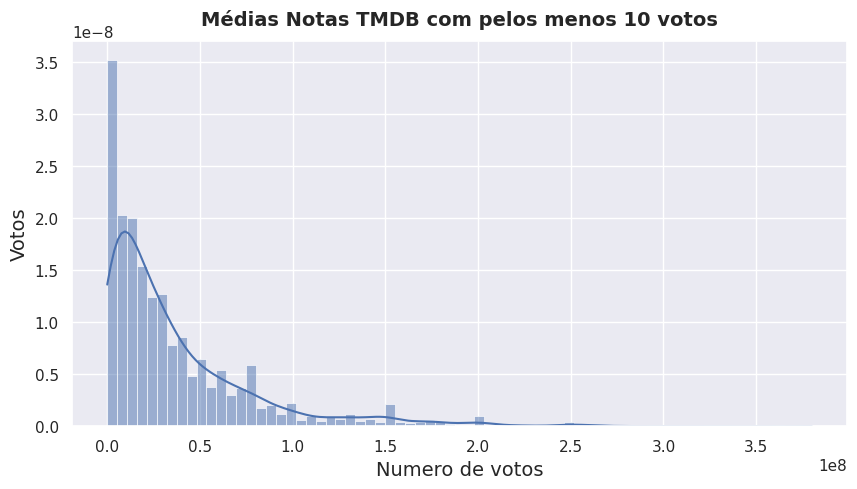

In [23]:
ax = sns.histplot(budget_maior_do_zero, kde = True, stat="density")
ax.figure.set_size_inches(10,5)


ax.set_title('Médias Notas TMDB com pelos menos 10 votos', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Numero de votos', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

In [24]:
dados2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

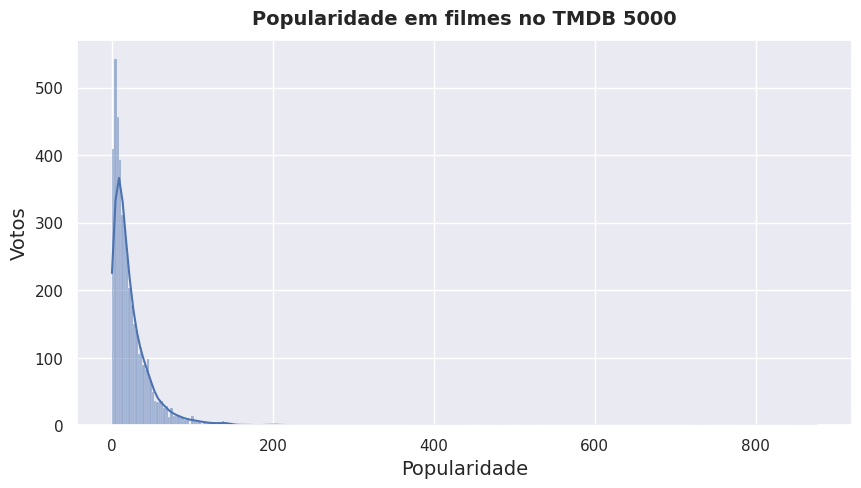

In [25]:
# Dados da popularidade 
ax = sns.histplot(dados2['popularity'], kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Popularidade em filmes no TMDB 5000', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Popularidade', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14);

In [26]:
dados2['runtime'].isnull().sum()

1

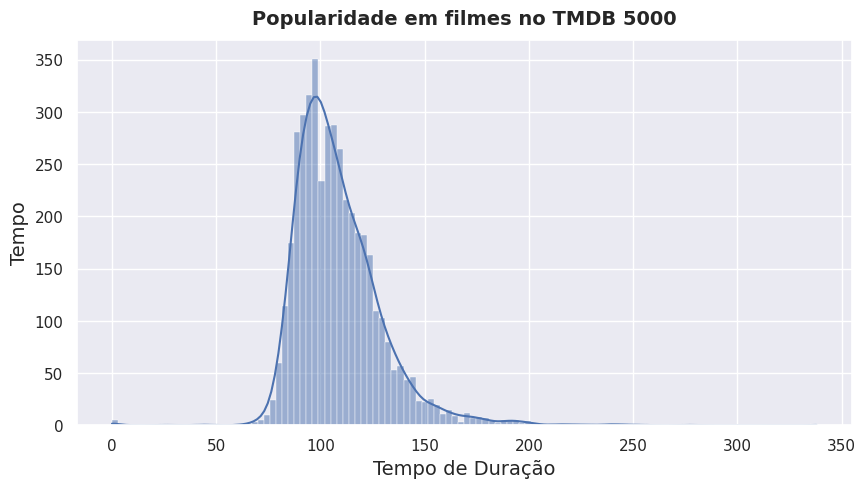

In [27]:
# Verificando duração dos filmes
# Estou excluindo dados NA
ax = sns.histplot(dados2['runtime'].dropna(), kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Popularidade em filmes no TMDB 5000', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Tempo de Duração', fontsize = 14)
ax.set_ylabel('Tempo', fontsize = 14);

Parece que tem filmes com duração igual a zero, o que não faz o menor sentindo

In [28]:
filmes_duracao_maior_zero = dados2.query('runtime > 0')['runtime']

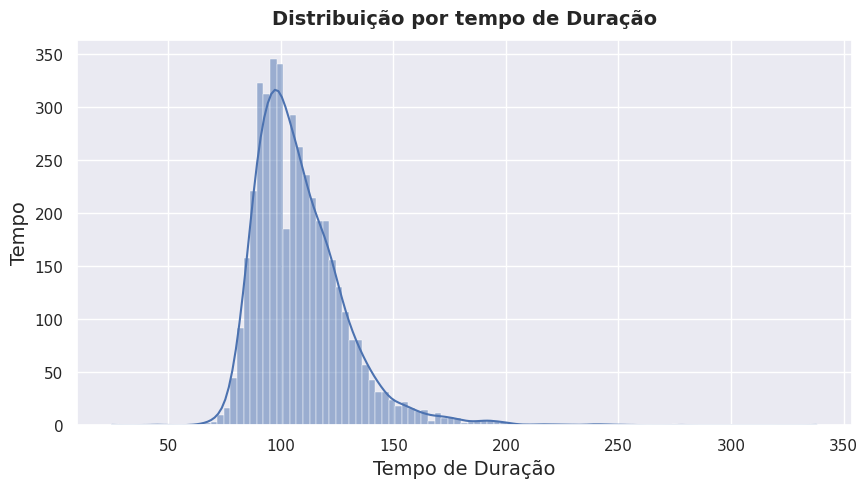

In [29]:
# Verificando duração dos filmes
ax = sns.histplot(filmes_duracao_maior_zero, kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Distribuição por tempo de Duração', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Tempo de Duração', fontsize = 14)
ax.set_ylabel('Tempo', fontsize = 14);

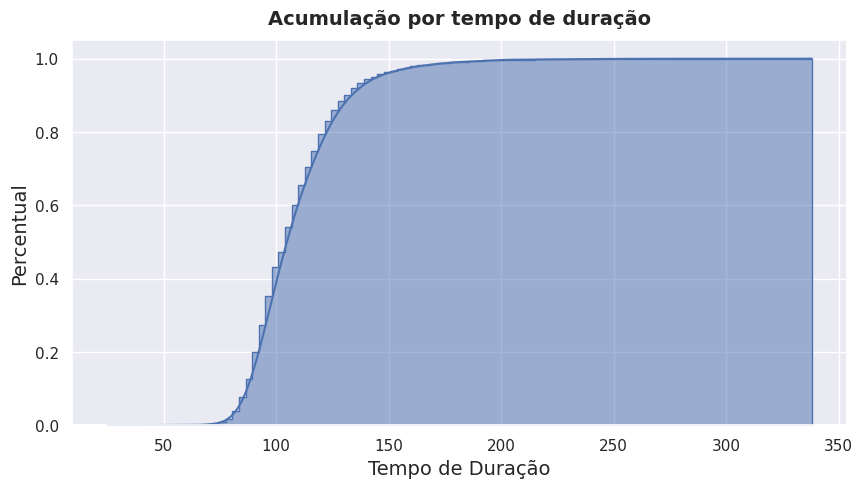

In [30]:
# Acumulativo Duração dos Filmes Atenção no parametro stat - Ele define que quero densidade
ax = sns.histplot(filmes_duracao_maior_zero, 
                  element="step", fill=True,cumulative=True,
                  stat="density", common_norm=False, kde = True)
ax.figure.set_size_inches(10,5)


ax.set_title('Acumulação por tempo de duração', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Tempo de Duração', fontsize = 14)
ax.set_ylabel('Percentual', fontsize = 14);

## **Teste de Confiança - Movielens: média dos filmes com pelo menos 10 votos**

Vamos ver o comportamento das médias o longo do tempo pegando os dados em ordem

In [31]:
nota_media = nota_media_dos_filmes_com_pelo_menos_10_votos.mean()
print(f'Méda dos,fimens com pelo menos 10 votos {nota_media}')

Méda dos,fimens com pelo menos 10 votos 3.443810571746584


In [32]:
nota_media_dos_filmes_com_pelo_menos_10_votos.iloc[0:3].mean()

3.5374545996639024

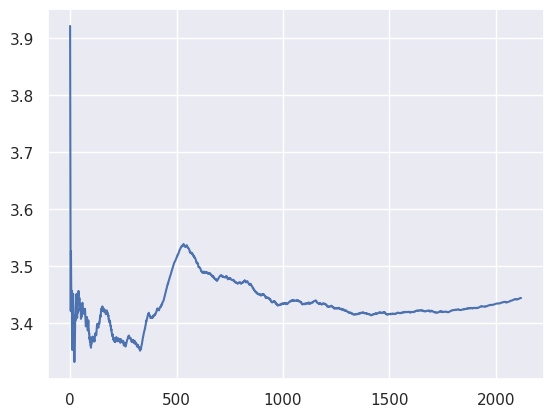

In [33]:
# Gerando Gráfico para verificar o comportamento da média dos votos
# Datalhe, este calculo pega as médias na ordem que estão dispostas
medias = []
for i in range(1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
    medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos.iloc[0:i].mean())

plt.plot(medias);

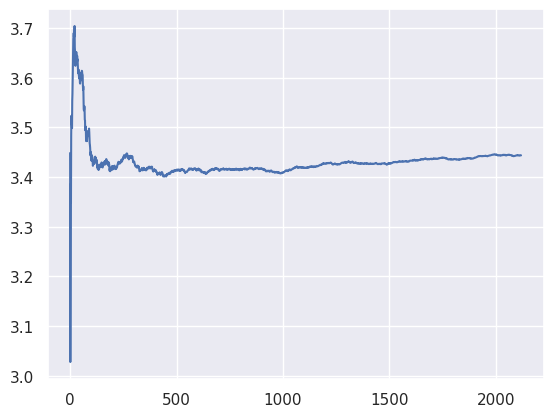

In [34]:
# Agora quero ver o comportamento das médias ao longo do tempo de forma aleatória
# o Código abaixo deixa 100% da minha base aleatório

np.random.seed(4546)

temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

media = [temp.iloc[0:i].mean() for i in range(1, len(temp))]

plt.plot(media);

---

### **Definição de teste T**

Um teste t é um teste de hipótese usado pelo pesquisador para comparar médias populacionais para uma variável, classificada em duas categorias, dependendo da variável do intervalo menor. Mais precisamente, um teste t é usado para examinar como as médias obtidas de duas amostras independentes diferem.

O teste T segue a distribuição t, que é apropriada quando o tamanho da amostra é pequeno e o desvio padrão da população não é conhecido. A forma de uma distribuição t é altamente afetada pelo grau de liberdade. O grau de liberdade implica o número de observações independentes em um determinado conjunto de observações.

<b>Suposições do teste T :</b>

- Todos os pontos de dados são independentes.</p>
- O tamanho da amostra é pequeno. Geralmente, um tamanho de amostra superior a 30 unidades de amostra é considerado grande, caso contrário, pequeno, mas não deve ser inferior a 5, para aplicar o teste t.</p>
- Os valores das amostras devem ser obtidos e registrados com precisão.

In [35]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

a,b = zip(descr_todos_com_10_votos.tconfint_mean())

print(f'O intervalo de confiança está entre {round(a[0],2)}% e {round(b[0],2)}%')

O intervalo de confiança está entre 3.42% e 3.46%


---

### **Definição de teste Z**

O teste Z refere-se a uma análise estatística univariada usada para testar a hipótese de que as proporções de duas amostras independentes diferem muito. Ele determina até que ponto um ponto de dados está longe de sua média do conjunto de dados, em desvio padrão.

O pesquisador adota o teste z, quando a variância da população é conhecida, em essência, quando há um grande tamanho da amostra, a variância da amostra é considerada aproximadamente igual à variância da população. Desta forma, assume-se que é conhecido, apesar do fato de que apenas os dados da amostra estão disponíveis e, portanto, o teste normal pode ser aplicado.


<b>Suposições do teste Z :</b>

- Todas as observações de amostra são independentes</p>

- O tamanho da amostra deve ser superior a 30.</p>

- A distribuição de Z é normal, com média zero e variância 1.</p>


In [36]:
from statsmodels.stats.weightstats import zconfint

temp = zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [37]:
a, b = zip(temp)
print(f'O intervalo de confiança está entre {round(a[0],2)}% e {round(b[0],2)}%')

O intervalo de confiança está entre 3.42% e 3.46%


### **Comparando um dado com o restante da amostra**

In [38]:
# Vamos analisar as notas do Toy Store com os demais filmes da base

In [39]:
notas1 = movie.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


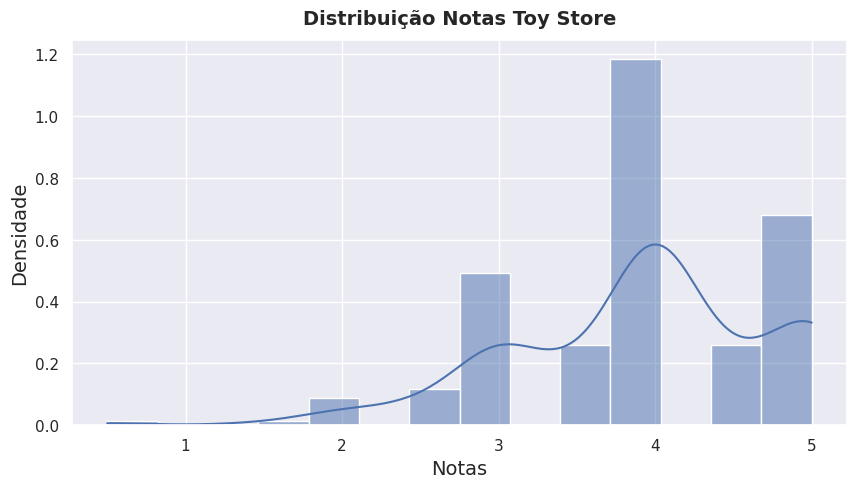

In [40]:
# Verificando distribuição nota do Filme
ax = sns.histplot(notas1['rating'], kde = True, stat="density")
ax.figure.set_size_inches(10,5)


ax.set_title('Distribuição Notas Toy Store', fontsize = 14, weight = 'bold', y = 1.02)
ax.set_xlabel('Notas', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14);

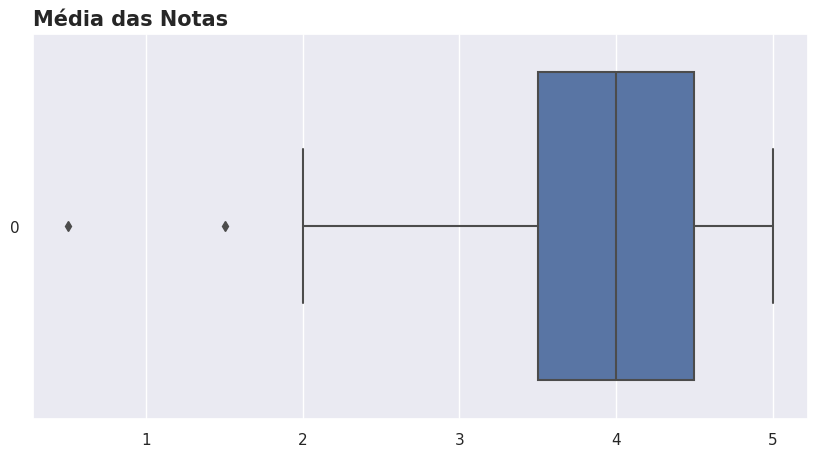

In [41]:
ax = sns.boxplot(notas1['rating'], orient= 'h')
ax.figure.set_size_inches(10,5)

ax.set_title('Média das Notas', fontsize = 15, weight = 'bold', loc = 'left');

In [42]:
# Verificando valor da média das notas do filme 
# Veja que a médias das notas é 3,92
notas1['rating'].mean()

3.9209302325581397

In [43]:
# Veriricando média geral da minha amostra
# Veja que a médias da amostra é de 3,5
movie['rating'].mean()

3.501556983616962

In [44]:
# Verificando tamanho da minha amostra para ver qual teste de confiança aplicar
# Se tiver valor menor ou igual a 30, aplico Ttest, senão Ztest
len(notas1['rating'])

215

In [45]:
# Como tenho 215 amostras, vou aplicar o Ztest que já foi instanciado anteriormente
# Com isso tenho o intervalo de confiança abaixo
zconfint(notas1['rating'])

(3.8093359183563402, 4.032524546759939)

### **Definição de Z-Test**

Um teste z é um teste estatístico usado para determinar se duas médias populacionais são diferentes quando as variâncias são conhecidas e o tamanho da amostra é grande.

Presume-se que a estatística de teste tenha uma distribuição normal, e parâmetros incômodos, como desvio padrão, devem ser conhecidos para que um teste z preciso seja executado.

<b>Caracteristicas</b>

- Um teste z é um teste estatístico para determinar se duas médias populacionais são diferentes quando as variâncias são conhecidas e o tamanho da amostra é grande.</p>

- O teste z é um teste de hipótese no qual a estatística z segue uma distribuição normal.</p>

- Uma estatística z, ou pontuação z, é um número que representa o resultado do teste z.</p>

- Z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size.</p>

- Z-tests assume the standard deviation is known, while t-tests assume it is unknown.</p>


In [46]:
from statsmodels.stats.weightstats import ztest

ztest(notas1['rating'], value = 3.43)

(8.622353043864221, 6.5592112268213646e-18)

Nesta caso o p-value foi extramamente baixo, vou descartar a hipótese de que a média do Toy Syore é igual a média geral dos filmes.

O problema deste tipo de teste é que quando tenho muitos dados, dificilmente terei valores iguais.

Nestes casos, vale muito apena verificar os intervalos, as distribuições para tentar entender melhor os dados que tenho em mãos e seu comportamento.

---

### **Verificando Comportamento Notas do Filme**

Abaixo podemos ver o comportamento da média ao longo do tempo pegando dados aleatórios

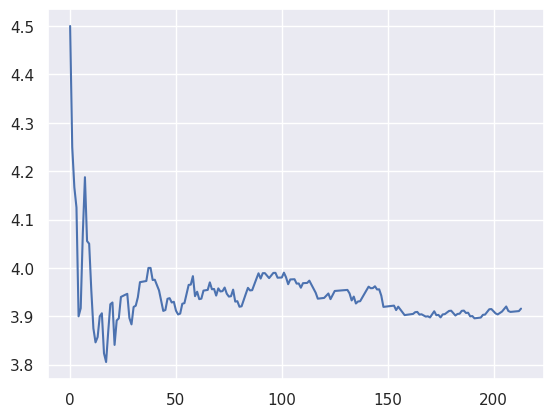

In [47]:
np.random.seed(72241)
temp = notas1.sample(frac = 1)['rating']

medias = [temp.iloc[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias);

/tmp/ipykernel_117871/1387292378.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  media = temp[0:i].mean()
/tmp/ipykernel_117871/1387292378.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  stat, p = ztest(temp[0:i], value = 3.43)


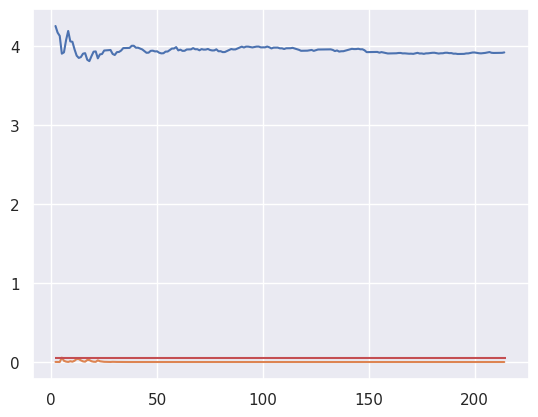

In [48]:
np.random.seed(72241)
temp = notas1.sample(frac = 1)['rating']

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.43)
    return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors = 'r')

### **Verificando intervalo de confiança de Duas Médias Diferentes**

Agora quero verificar o intervalo de confiança entre a média do filme Toy Store e o restante de todos os outros filmes.

In [51]:
media_notas_toy_store = notas1['rating']
media_all_movies = movie['rating']

zconfint(media_notas_toy_store, media_all_movies)

(0.2799245129192442, 0.5588219849631111)

Nota-se que a média do filme Toy Store fica entre 0,27 a 0,55 maior do que a média de todos os filmes da base

---

### **Verificando o P-value entre duas amostras de Notas**

Agora queremos validar que a média de notas do filme Toy Store é maior do que o restante da base. 

Para isso iremos utiliza o teste <b>ztest</b> para verificar o valor de P-value

In [54]:
ztest(media_notas_toy_store, media_all_movies)[1]

3.762112778881965e-09

Verifica-se que o valor de P-value é menor do que 0,05, o que valida a hipótese de que a média das notas do filme Toy Store é maior do que o restante dos filmes

---

In [57]:
descr_todas_as_notas = DescrStatsW(movie['rating'])
descr_toystore = DescrStatsW(notas1['rating'])
comparacao = descr_todas_as_notas.get_compare(descr_toystore)
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280


### **Analisando os Dados de Forma Visual**

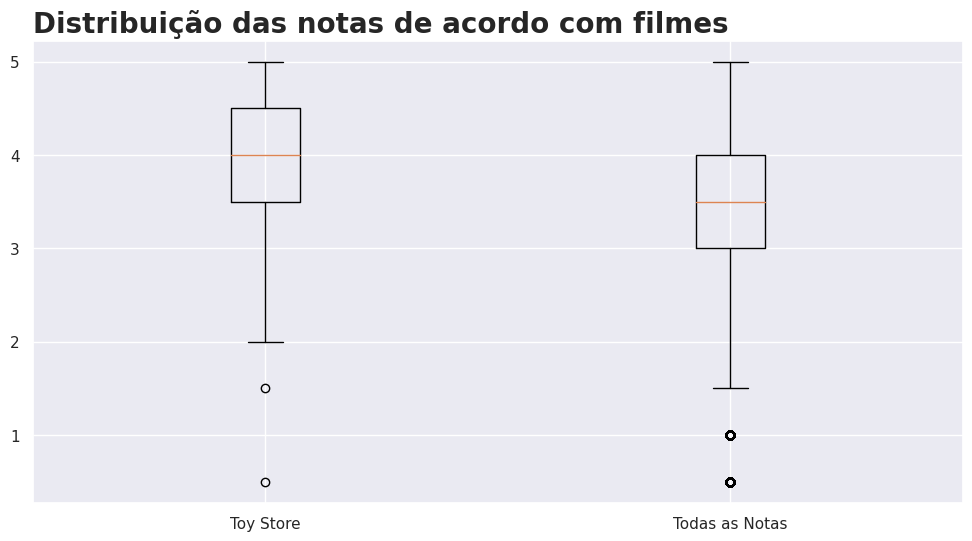

In [71]:
ax = plt.figure(figsize=(12,6))
plt.boxplot([notas1['rating'], movie['rating']], labels= ['Toy Store', 'Todas as Notas']);

plt.title('Distribuição das notas de acordo com filmes', fontsize = 20, weight = 'bold', loc= 'left');